In [1]:
import meep as mp

In [12]:
# Setup the computational cell
cell = mp.Vector3(16,8,0)

# Setup the waveguide
geometry = [mp.Block(mp.Vector3(mp.inf, 1, mp.inf),
            center = mp.Vector3(),
            material = mp.Medium(epsilon=12))]

# Define sources
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center = mp.Vector3(-7,0))]

# Define pml layer
pml_layers = [mp.PML(1.0)]

In [18]:
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=10
)

In [19]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000315905 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.027703 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

run 0 finished at t = 200.0 (4000 timesteps)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [28]:
matplotlib.style.use('dark_background')

In [73]:
diel_cmap = LinearSegmentedColormap.from_list("",[[24/256,24/256,24/256],'darkgreen'])
cmap_segments=[(0.0, 'blue'), (0.5, 'white', 0.0), (1.0, 'red')]
ez_cmap = ListedColormap([segment[1] for segment in cmap_segments])

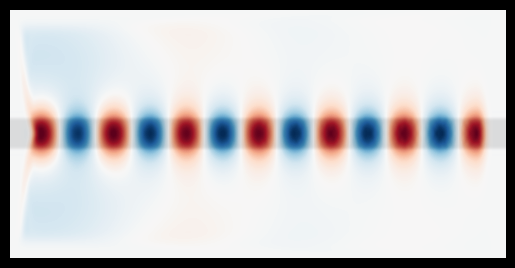

In [77]:
eps_data = sim.get_array(center=mp.Vector3(), size = cell, component = mp.Dielectric)

ez_data = sim.get_array(center = mp.Vector3(), size = cell, component = mp.Ez)

plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap = 'binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap= 'RdBu', alpha=0.9)
plt.axis('off')
plt.show()